In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm import tqdm

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Python/Datasets/TCS_stock_history.csv")
df.head(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [5]:
df.shape

(4463, 8)

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

In [7]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [8]:
numeric_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
std,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842
min,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000


In [9]:
corel=numeric_df.corr()
corel

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999888,0.999892,0.999787,-0.153362,0.059743,-0.006715
High,0.999888,1.000000,0.999867,0.999914,-0.150918,0.060044,-0.006597
Low,0.999892,0.999867,1.000000,0.999901,-0.154962,0.059916,-0.006622
Close,0.999787,0.999914,0.999901,1.000000,-0.152844,0.060179,-0.006635
Volume,-0.153362,-0.150918,-0.154962,-0.152844,1.000000,-0.010332,0.004752
Dividends,0.059743,0.060044,0.059916,0.060179,-0.010332,1.000000,0.142493
Stock Splits,-0.006715,-0.006597,-0.006622,-0.006635,0.004752,0.142493,1.000000


In [10]:
# Correlation of features with the target variable (Close Price)
correlation_with_close = numeric_df.corr()['Close'].sort_values(ascending=False)
print(correlation_with_close)

Close           1.000000
High            0.999914
Low             0.999901
Open            0.999787
Dividends       0.060179
Stock Splits   -0.006635
Volume         -0.152844
Name: Close, dtype: float64


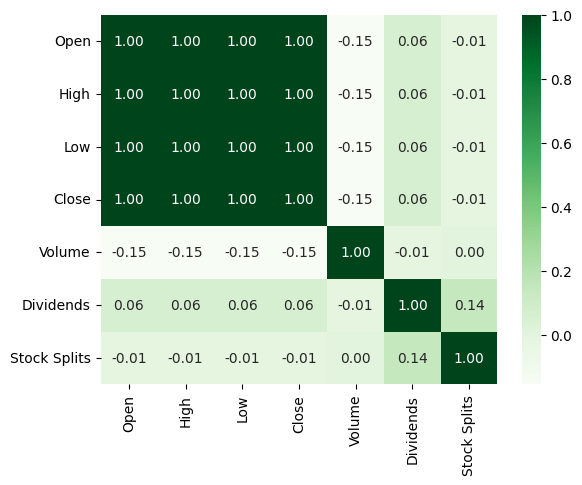

In [11]:
sns.heatmap(corel,annot= True,cmap= "Greens",fmt=".2f")
plt.show()

EDA

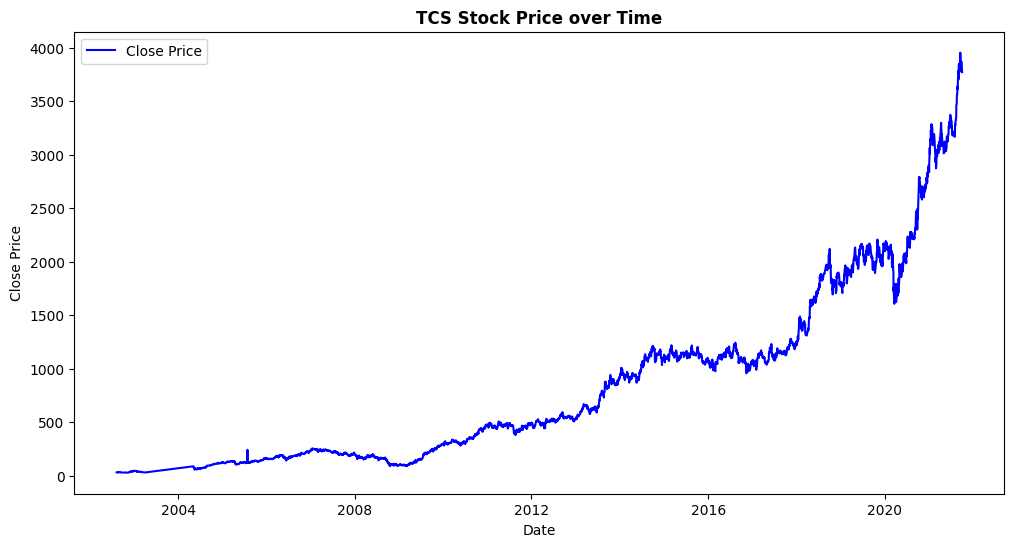

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price',
color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TCS Stock Price over Time',weight = "bold")
plt.legend()
plt.show()

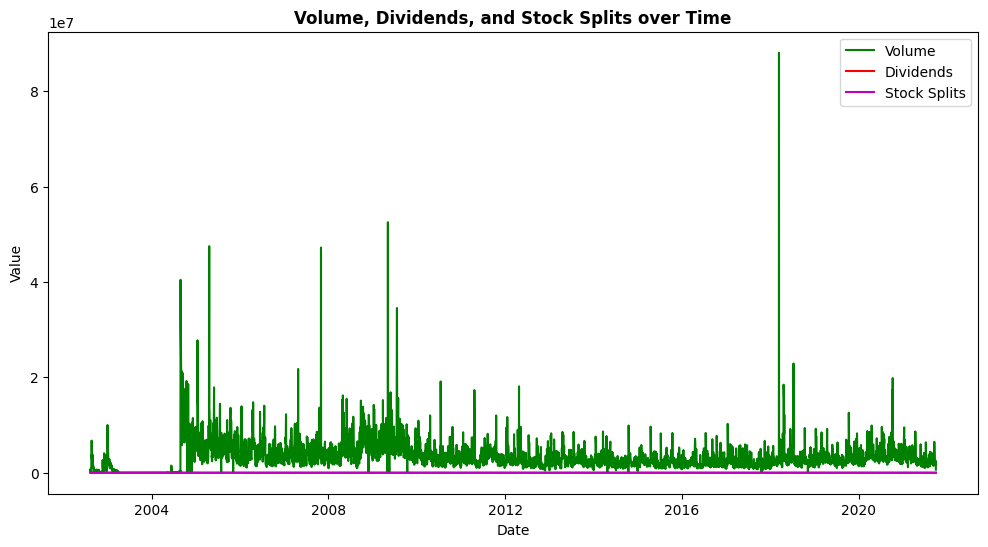

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='Volume', color='g')
plt.plot(df['Date'], df['Dividends'], label='Dividends',
color='r')
plt.plot(df['Date'], df['Stock Splits'], label='Stock Splits',
color='m')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends, and Stock Splits over Time',weight = "bold")
plt.legend()
plt.show()

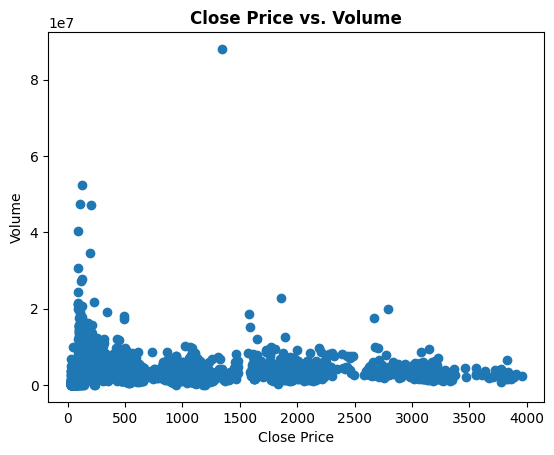

In [14]:
plt.scatter(df['Close'], df['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume',weight= "bold")
plt.show()

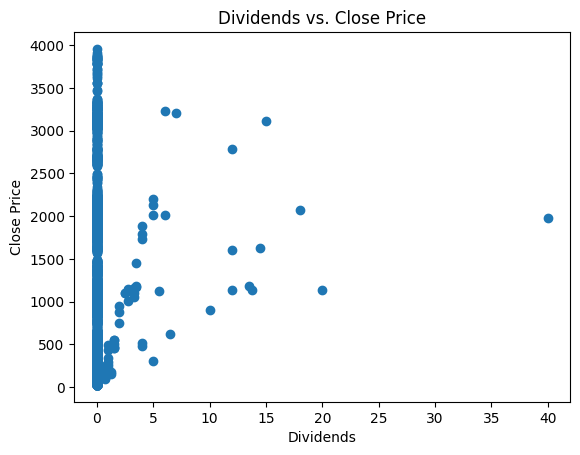

In [15]:
# Dividends vs. Close Price
plt.scatter(df['Dividends'], df['Close'])
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.title('Dividends vs. Close Price')
plt.show()

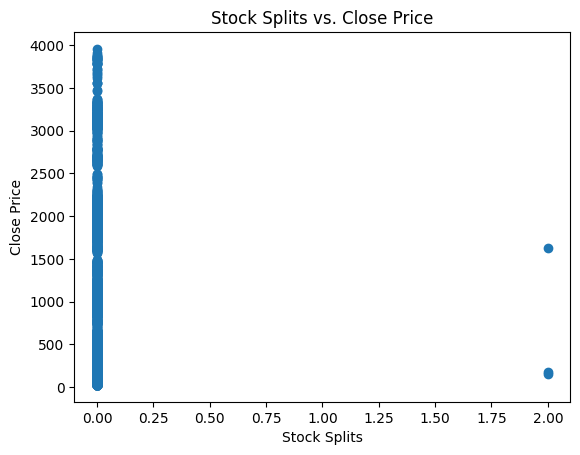

In [16]:
# Stock Splits vs. Close Price
plt.scatter(df['Stock Splits'], df['Close'])
plt.xlabel('Stock Splits')
plt.ylabel('Close Price')
plt.title('Stock Splits vs. Close Price')
plt.show()

Moving Averages

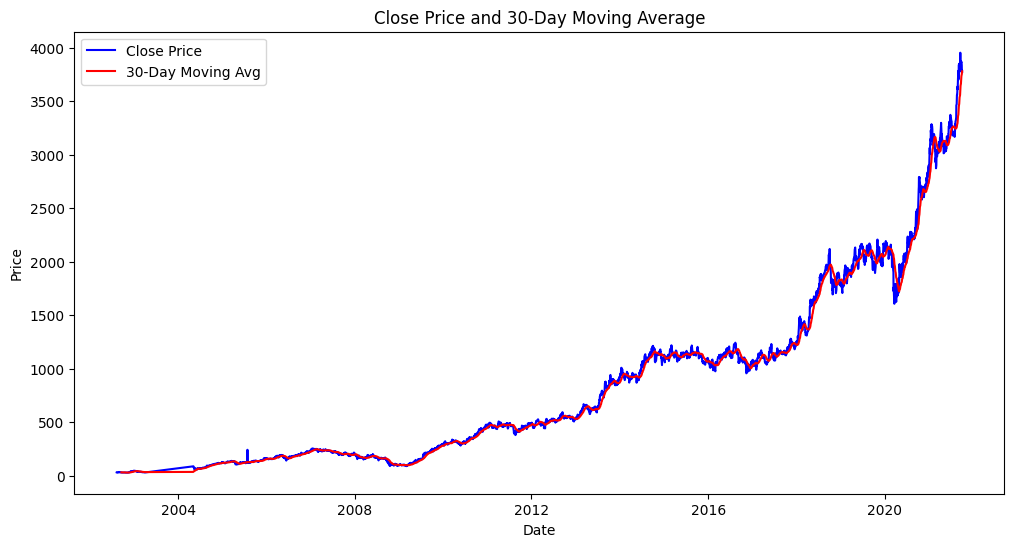

In [17]:
df['30-Day Moving Avg'] = df['Close'].rolling(window=30).mean()
# Plot Close price and moving average
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price',
color='b')
plt.plot(df['Date'], df['30-Day Moving Avg'], label='30-Day Moving Avg', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and 30-Day Moving Average')
plt.legend()
plt.show()

Moving Average Crossover Strategy

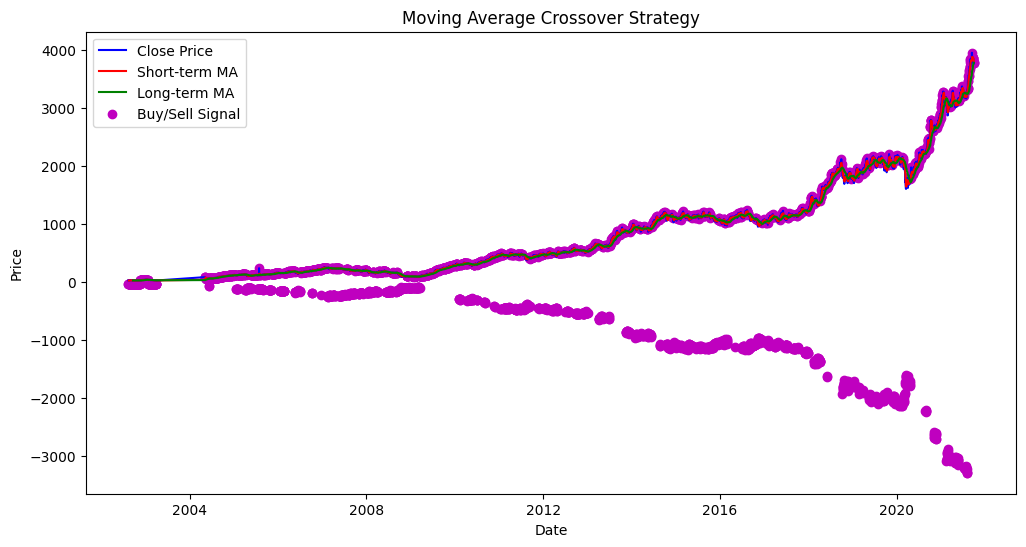

In [18]:
df['Short_MA'] = df['Close'].rolling(window=5).mean()
df['Long_MA'] = df['Close'].rolling(window=30).mean()
# Creating a trading signals based on moving average crossovers
df['Signal'] = np.where(df['Short_MA'] > df['Long_MA'], 1, -1)
# Plot the strategy signals
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price',
color='b')
plt.plot(df['Date'], df['Short_MA'], label='Short-term MA',
color='r')
plt.plot(df['Date'], df['Long_MA'], label='Long-term MA',
color='g')
plt.scatter(df['Date'], df['Close'] * df['Signal'],
label='Buy/Sell Signal', marker='o', color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

Daily Price Change

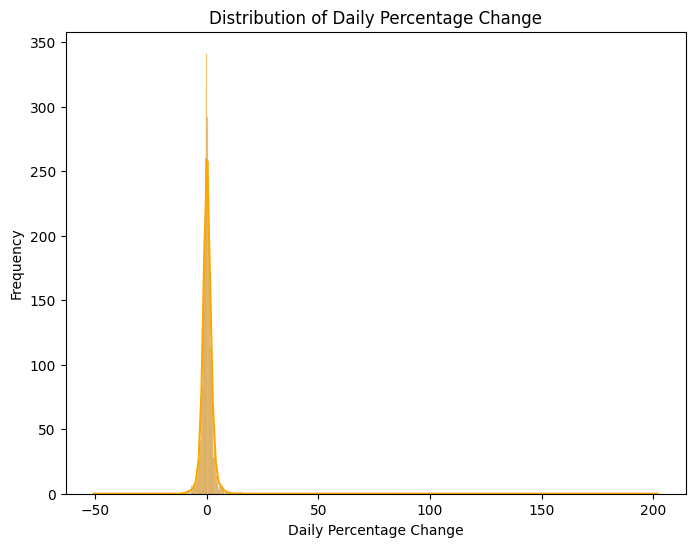

In [19]:
df['Daily_Price_Change'] = df['Close'].pct_change() * 100
# Distribution of daily percentage change
plt.figure(figsize=(8, 6))
sns.histplot(df['Daily_Price_Change'].dropna(), kde=True,
color='orange')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Percentage Change')
plt.show()

Feature Engineering

In [20]:
df['Moving_Avg_Close'] = df['Close'].rolling(window=7).mean()

Modelling, Data Preparation & Normalization



In [29]:
# Prepare the data for LSTM
X_train = df['Close'].values.reshape(-1, 1)
y_train = df['Close'].shift(-1).dropna().values
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Define the test data
test_ratio = 0.2
test_size = int(len(df) * test_ratio)
test_data = df[-test_size:]

In [30]:
# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

In [31]:
# Reshape the data for LSTM
X_train_lstm = X_train_scaled[:-1].reshape(-1, 1, 1)
y_train_lstm = X_train_scaled[1:]

Building a LSTM Model

In [46]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
# Set the number of epochs and batch size
epochs = 30
batch_size = 15

In [ ]:
# Train the model with tqdm progress bar
for epoch in tqdm(range(epochs)):
    for i in range(0, len(X_train_lstm), batch_size):
        X_batch = X_train_lstm[i:i+batch_size]
        y_batch = y_train_lstm[i:i+batch_size]
        model.train_on_batch(X_batch, y_batch)

In [39]:
# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

Predictions using LSTM

In [40]:
lstm_pred = model.predict(X_test_lstm).flatten()

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Inverse transform of the predictions


In [41]:
lstm_pred = lstm_pred.reshape(-1, 1)
lstm_pred = scaler.inverse_transform(lstm_pred)

Visualization of LSTM predictions


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Close Price', color='b')
plt.plot(test_data['Date'], lstm_pred, label='Predicted Close Price (LSTM)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.show()